# Project scope

Data visualization notebook leveraging seaborn and matplotlib to tailor plots while creating meaningful visualizations. It aims to serve as an example on how to create more advanced plots using these libraries alongside pandas. These are the plots created: lollipop plot, combo line plot with different magnitude data points, line plot highlighting gap between lines, two-sided bar plots with change-over-time. Also, I have experimented with a few data visualization concepts such as highlighting a portion of a graph, insert colour in the gap between two-line plots and applying smoothing to a line chart.

# Data source

The data used in this project can be found on Kaggle and it includes information on passengers, flights, seat-miles, and revenue-miles from 2002 to 2017 for the US commercial aviation industry. You can read more about the data using the following link: 
https://www.kaggle.com/datasets/shellshock1911/us-commercial-aviation-industry-metrics

A few extra notes on the data I have used for visualization: 
 * **No null values** for any of the variables analysed between 2003-2016<br>
 * **US commercial airlines included**: Alaska Airlines, Allegient Air, American Airlines, Atlas Airlines, Delta Airlines, Frontier Airlines, Envoy Air, <br> ExpressJet Airlines, Hawaiian Airlines, JetBlue Airways, SkyWest Airlines, Southwest Airlines, Spirit Airlines, United Airlines, Virgin America<br>
 * **Original Source:** [https://www.transtats.bts.gov/Data_Elements.aspx](https://www.transtats.bts.gov/Data_Elements.aspx)

# Code

In [1]:
# Libraries to import

%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
from matplotlib.ticker import FuncFormatter

# Import data
all_airlines_all_airports = pd.read_csv('../input/all_airlines_all_airports.csv')
# Change the date to datetime
all_airlines_all_airports['Date'] = pd.to_datetime(all_airlines_all_airports['Date'])
# Subset the data to take complete years - exclude 2002 and 2007 as these are not complete
all_airlines_all_airports = all_airlines_all_airports.loc[(all_airlines_all_airports.Date > '2002-12-31') & (all_airlines_all_airports.Date < '2017-01-01')]
# Take the year out of date
all_airlines_all_airports['Year'] = all_airlines_all_airports['Date'].dt.year

## Lollipop bar
### Average passengers per flight - domestic and international travellers

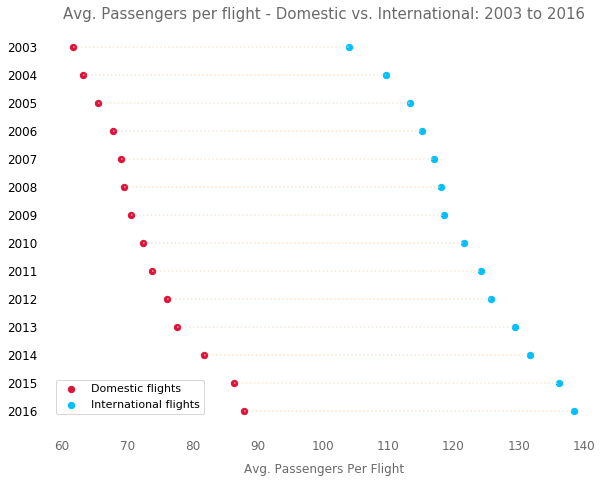

In [2]:
# Group data for Domestic and International flights per year
all_airlines_all_airports_Dom = all_airlines_all_airports.groupby(['Year'], sort=True)[['Flights_Domestic','Passengers_Domestic']].sum().reset_index()
all_airlines_all_airports_Int = all_airlines_all_airports.groupby(['Year'], sort=True)['Flights_International','Passengers_International'].sum().reset_index()
# Concatenate both data sets
all_airlines_all_airports_Dom.set_index('Year', inplace=True)# set year to index
all_airlines_all_airports_Int.set_index('Year', inplace=True)
all_airlines_all_airports_Traffic = pd.concat([all_airlines_all_airports_Dom,all_airlines_all_airports_Int],axis=1)
# Get average passengers per flight for Domestic and International flights
all_airlines_all_airports_Traffic['Avg_Pas_Flight_Dom'] = round((all_airlines_all_airports_Traffic['Passengers_Domestic'] / all_airlines_all_airports_Traffic['Flights_Domestic']),2) 
all_airlines_all_airports_Traffic['Avg_Pas_Flight_Int'] = round((all_airlines_all_airports_Traffic['Passengers_International'] / all_airlines_all_airports_Traffic['Flights_International']),2) 

# Create a Lollipop bar
# Size the plot    
plt.figure(figsize=(10, 7.5))
# Remove the plot frame lines 
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
# Re-order year following the values of the first value
ordered_df = all_airlines_all_airports_Traffic.sort_values(by='Year', ascending=False)
my_range=range(1,len(all_airlines_all_airports_Traffic.index)+1)
# The vertical plot is made using the hline function
plt.hlines(y=my_range, xmin=ordered_df['Avg_Pas_Flight_Dom'], xmax=ordered_df['Avg_Pas_Flight_Int'], color='peachpuff', alpha=0.7, linestyle=':')
# Create both scatter points
plt.scatter(ordered_df['Avg_Pas_Flight_Dom'], my_range, color='crimson', label='Domestic flights', s=40)
plt.scatter(ordered_df['Avg_Pas_Flight_Int'], my_range, color='deepskyblue' , label='International flights', s=40)
plt.legend(bbox_to_anchor=(0.02, 0.13), loc=2, borderaxespad=0., fontsize=11)
# Add title and axis names
title_font = {'family': 'sans-serif','color':  'dimgrey','weight': 'normal','size': 15,}#title font
plt.yticks(my_range, ordered_df.index.values, color='black', fontsize=12)
plt.xticks(color='dimgrey', fontsize=12)
plt.title("Avg. Passengers per flight - Domestic vs. International: 2003 to 2016", loc='center',fontdict=title_font)
plt.xlabel('Avg. Passengers Per Flight', color='dimgrey', fontsize=12, labelpad=10)
# Remove tick parameters
ax.tick_params(axis="both", which="both", bottom=False, top=False,labelbottom=True, left=False, right=False, labelleft=True)

plt.show()

* Domestic and international average passengers per flight increased during the period - **26 and 34 extra passengers/flight on average**, respectively <br><br>
* Capacity gap between domestic and international flights did not change much over the years (width of dotted line similar over time), with international flights carrying an **extra 49 passengers per flight on average** <br> <br>
* From 2014, passengers per flight increase intensified in both domestic and international routes, possibly a consequence of [stronger demand for air travel](http://www.iata.org/pressroom/pr/Pages/2015-02-05-01.aspx)

## Combo line plot (highlighting a portion of a graph)
### Average daily flights and number of passengers

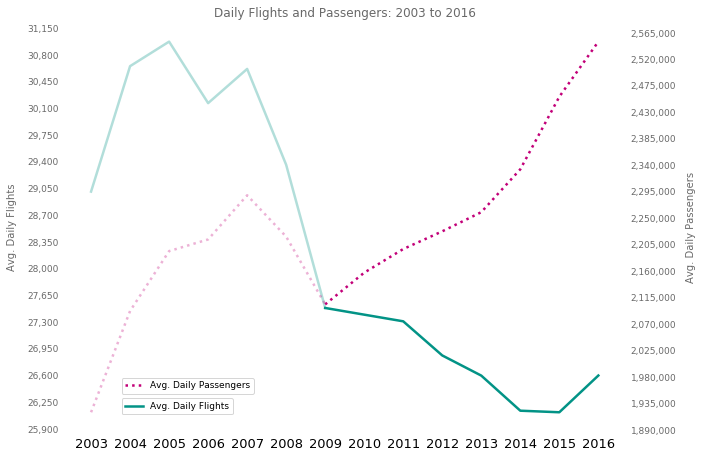

In [3]:
# Add columns for total flights and passengers
all_airlines_all_airports['Total_Flights'] = all_airlines_all_airports['Flights_Domestic'] + all_airlines_all_airports['Flights_International']
all_airlines_all_airports['Total_Passengers'] = all_airlines_all_airports['Passengers_Domestic'] + all_airlines_all_airports['Passengers_International']
# Group data for total flights and passengers per year
all_airlines_all_airports_Traffic = all_airlines_all_airports.groupby(['Year'], sort=True)[['Total_Flights','Total_Passengers']].sum().reset_index()
# Get average daily flights and passengers
all_airlines_all_airports_Traffic['Avr_Daily_Flights'] = round((all_airlines_all_airports_Traffic['Total_Flights'] / 365),2)
all_airlines_all_airports_Traffic['Avr_Daily_Passengers'] = round((all_airlines_all_airports_Traffic['Total_Passengers'] / 365),2)

# Multiple line plot
plt.figure(figsize=(10, 7.5))  
# Remove the plot frame lines ax1   
ax1 = plt.subplot(111)    
ax1.spines["top"].set_visible(False)    
ax1.spines["bottom"].set_visible(False)    
ax1.spines["right"].set_visible(False)    
ax1.spines["left"].set_visible(False) 
#Share the same axis between line 1 and 2
ax2 = ax1.twinx()
# Remove the plot frame lines ax2   
ax2.spines["top"].set_visible(False)    
ax2.spines["bottom"].set_visible(False)    
ax2.spines["right"].set_visible(False)    
ax2.spines["left"].set_visible(False)
# Set range of y ticks    
ax1.set_yticks(range(0, 32000, 350))    
ax2.set_yticks(range(0, 2650000, 45000)) 
# Font and colour for axis
ax1.set_yticklabels(range(0, 32000, 350), color='dimgrey', fontsize=9)
ax2.set_yticklabels(range(0, 2650000, 45000), color='dimgrey', fontsize=9)
# Set xaxis label size
ax1.xaxis.set_tick_params(labelsize=13)
# Set labels to increment yearly
ax1.xaxis.set_ticks(np.arange(2003, 2017, 1))
# Remove tick markers
ax1.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)    
ax2.tick_params(right=False)   
# Get thousand separater for y ticks
ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()])
ax2.set_yticklabels(['{:,}'.format(int(x)) for x in ax2.get_yticks().tolist()])
# Line 1 - (split data to highlight trends)
ax1.plot('Year', 'Avr_Daily_Flights', data=all_airlines_all_airports_Traffic.mask(all_airlines_all_airports_Traffic.apply(lambda x: x.index < 6)), linewidth=2.5, color='xkcd:teal', label='Avg. Daily Flights')
ax1.plot('Year', 'Avr_Daily_Flights', data=all_airlines_all_airports_Traffic.mask(all_airlines_all_airports_Traffic.apply(lambda x: x.index > 6)), linewidth=2.5, color='xkcd:teal', alpha=0.3, label='Avg. Daily Flights')
# Line 2 - (split data to highlight trends)
ax2.plot( 'Year', 'Avr_Daily_Passengers', data=all_airlines_all_airports_Traffic.mask(all_airlines_all_airports_Traffic.apply(lambda x: x.index < 6)), linewidth=2.5, color='xkcd:magenta', linestyle=':', label='Avg. Daily Passengers')
ax2.plot( 'Year', 'Avr_Daily_Passengers', data=all_airlines_all_airports_Traffic.mask(all_airlines_all_airports_Traffic.apply(lambda x: x.index > 6)), linewidth=2.5, color='xkcd:magenta',alpha=0.3, linestyle=':', label='Avg. Daily Passengers')
# Add title and axis names
title_font = {'family': 'sans-serif','color':  'dimgrey','weight': 'normal','size': 12,}#title font
plt.title("Daily Flights and Passengers: 2003 to 2016", loc='center',fontdict=title_font)
ax1.set_ylabel('Avg. Daily Flights', color='dimgrey', fontsize=10, labelpad=10)
ax2.set_ylabel('Avg. Daily Passengers', color='dimgrey', fontsize=10, labelpad=10)
# Add legend
ax1.legend(['Avg. Daily Flights'],bbox_to_anchor=(0.1, 0.08), loc=2, borderaxespad=0., fontsize=9)
ax2.legend(['Avg. Daily Passengers'],bbox_to_anchor=(0.1, 0.13), loc=2, borderaxespad=0., fontsize=9)

plt.show()

* 2003-2007: flights and passengers tend to increase proportionally - except from 2005 to 2006 <br> <br>
* 2007-2009: **sharp decrease in avg. passengers and flights**  - linking with the [US sub-prime crisis period and its effects on the aviation industry](http://www.telegraph.co.uk/travel/travelnews/3171606/Financial-crisis-Thousands-of-flights-scrapped-by-airlines.html) <br> <br>
* 2009 onwards: **strong increase in daily passengers with less daily flights** reflecting the wider industry strategic move to [have fewer flights with more passengers](https://www.travelandleisure.com/travel-news/flights-more-crowded-than-ever-before) <br> <br>


## Line plot (colour the gap between two-line & line smoothing)
### Passenger traffic across the year

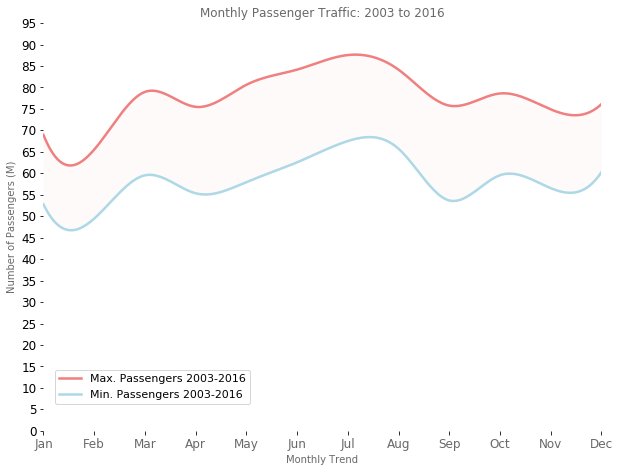

In [4]:
# Get sum of total passengers
all_airlines_all_airports ['Total_Passengers'] = all_airlines_all_airports['Passengers_Domestic'] + all_airlines_all_airports['Passengers_International']
# Subset the data
total_passengers = all_airlines_all_airports.loc[:,['Date','Total_Passengers']]
# Remove the year
total_passengers['Date'] = total_passengers['Date'].dt.strftime('%m-%d')
# Extract the max temperature for each day with group by 
passengers_max_03_16 = total_passengers.groupby(['Date'], sort=True)['Total_Passengers'].max().reset_index()
passengers_min_03_16 = total_passengers.groupby(['Date'], sort=True)['Total_Passengers'].min().reset_index()

# Multiple line plot with smoothing
plt.figure(figsize=(10,7.5))
# Remove the plot frame lines ax1
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
# Set range of axis    
ax.set_ylim(top=10)  
ax.set_ylim(bottom=0)
ax.set_xlim(1,12)
# Creat graph and apply line smoothing
T = np.array([1,2,3,4,5,6,7,8,9,10,11,12])# x range
# Apply smoothing for max values
max_pass = np.array(passengers_max_03_16['Total_Passengers']) #y values
max_pass = max_pass / 1000000 # reduce size of the number to be dysplayed
xnew = np.linspace(T.min(),T.max(),300)#increase number of points between values to smooth the line 
spl_max = make_interp_spline(T, max_pass, k=3)
power_smooth_max = spl_max(xnew)
# Apply smoothing for min values
min_pass = np.array(passengers_min_03_16['Total_Passengers']) #y values
min_pass = min_pass / 1000000 # reduce size of the number to be dysplayed
spl_min = make_interp_spline(T, min_pass, k=3)
power_smooth_min = spl_min(xnew)
# Plot both min and max lines for each month from 2003 to 2016
ax.plot(xnew,power_smooth_max, label = 'Max. Passengers 2003-2016', color='lightcoral', linewidth=2.5)
ax.plot(xnew,power_smooth_min, label = 'Min. Passengers 2003-2016', color='lightblue', linewidth=2.5)
# Define range of x and y ticks
plt.xticks(np.arange(min(xnew), max(xnew)+1, 1.0))
plt.yticks(np.arange(0, 100, 5))
# Define style of x and y
plt.yticks(color='black', fontsize=12)
plt.xticks(T, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], color='dimgrey', fontsize=12)
plt.xlabel('Monthly Trend', color='dimgrey')
plt.ylabel('Number of Passengers (M)', color='dimgrey', fontsize=10)
plt.title('Monthly Passenger Traffic: 2003 to 2016', color='dimgrey', loc='center')
plt.legend(bbox_to_anchor=(0.02, 0.15), loc=2, borderaxespad=0., fontsize=11)
plt.fill_between(xnew, power_smooth_max, power_smooth_min, color='snow')

plt.show()

* July had the highest number of passengers flying across all airlines during this period - 87.5M in 2016 <br> <br>
* February seems to be the quietest period to travel with almost half the passengers taking a flight comparing with July - lowest ever in Feb 2003 with 49.5M passengers <br> <br>
* April to August seems to be the busiest travel period during the year - a further point of analysis could be to explore how that relates to travel fares

## Two-sided bar plot 
### Available seats per mile (ASM) and revenue per mile (RPM)

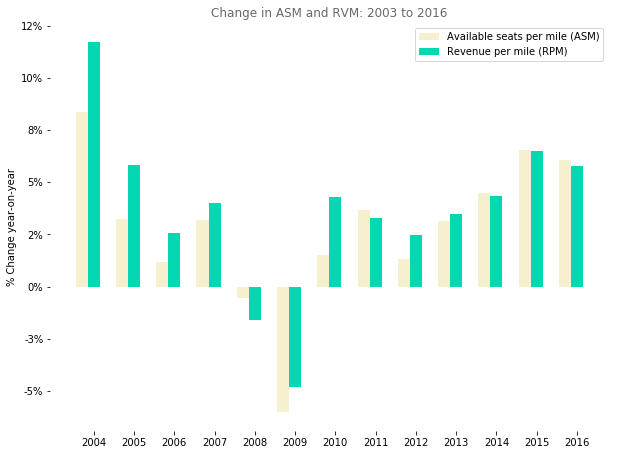

In [5]:
# Add column for total ASM and RPM
all_airlines_all_airports['Total_ASM'] = all_airlines_all_airports['ASM_Domestic'] + all_airlines_all_airports['ASM_International']
all_airlines_all_airports['Total_RPM'] = all_airlines_all_airports['RPM_Domestic'] + all_airlines_all_airports['RPM_International']
# Group data for total ASM and RPM
all_airlines_all_airports_Traffic = all_airlines_all_airports.groupby(['Year'], sort=True)[['Total_ASM','Total_RPM']].sum().reset_index()
# Add column for percentage change for ASM and RPM
all_airlines_all_airports_Traffic['Pct_change_ASM'] = all_airlines_all_airports_Traffic['Total_ASM'].pct_change()
all_airlines_all_airports_Traffic['Pct_change_RPM'] = all_airlines_all_airports_Traffic['Total_RPM'].pct_change()
# Remove 2003 as there is no % change for first year of analysis
all_airlines_all_airports_Traffic = all_airlines_all_airports_Traffic[all_airlines_all_airports_Traffic.Year != 2003]

# Create a bar plot
# Size the plot    
plt.figure(figsize=(10, 7.5))
# Remove the plot frame lines 
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
# width of the bars
barWidth = 0.3
# ASM bar
ASM = list(all_airlines_all_airports_Traffic['Pct_change_ASM'])
# RPM bar
RPM = list(all_airlines_all_airports_Traffic['Pct_change_RPM'])
# The x position of bars
ASM_x = np.arange(len(ASM))
RPM_x = [x + barWidth for x in ASM_x]
# Create ASM bars
plt.bar(ASM_x, ASM, width = barWidth, color = 'xkcd:gold', capsize=7, alpha=0.2, label='Available seats per mile (ASM)')
# Create RPM bars
plt.bar(RPM_x, RPM, width = barWidth, color = 'xkcd:aquamarine', capsize=7, label='Revenue per mile (RPM)')
# Take labels for years
plt.xticks([r + barWidth for r in range(len(ASM_x))], ['2004','2005','2006','2007','2008','2009',
                                                      '2010','2011','2012','2013','2014','2015','2016'])
# Change y ticks to percentage
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
# Add y label 
plt.ylabel('% Change year-on-year')
# Add legend and title
plt.legend()
plt.title('Change in ASM and RVM: 2003 to 2016', color='dimgrey', loc='center')

plt.show()

* Metrics:<br>
 * ASM (Available Seat Mile) - measures airplane's carrying capacity available to generate revenues
 * RPM (Revenue Per Mile) - measures number of miles travelled by paying passengers <br><br>
* 2003-2007: **positive outlook** with higher revenue growth comparing with available capacity - greater ability to generate revenue from available seats<br><br>
* 2008-2009: both **RPM and ASM decrease substantially**, coinciding again with US sub-prime crisis <br><br>
* 2009 onwards: **RPM and ASM grow at similar rate**, which might imply slower revenue growth as [industry recovered with financial crises](https://skift.com/2018/09/14/10-years-later-how-the-travel-industry-came-back-from-the-financial-crisis/)<br><br>

These two metrics only show part of the picture. One would have to look at Cost Per Available Seat Mile (CASM) - not available in this dataset -  to understand <br> how profitable the industry has been over time. 

## Final notes: 
* Clear distinction in space optimization between domestic and international flights <br>
* US commercial air traffic increasing with airlines keen to optimize cabin space and take more passengers in a single flight <br>
* Seasonality trend across the year with higher passenger traffic during the summer months<br>
* Increased demand for travel might not be a sign of extra revenue as airlines try to optimise ASM and RPM
